## Coding Exercise #0511

In [39]:
#import colab
import numpy as np
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/socrates/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/socrates/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/socrates/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1. NLP classification analysis:

#### 1.1. Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Specify the folder and read in the subfolders.
#reviews = load_files('/content/drive/MyDrive/txt_sentoken/')
reviews = load_files('review_polarity/txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [8]:
print(len(my_docs)," ",len(y))
my_docs[0]

2000   2000


b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000]))

In [22]:
y

array([0, 1, 1, ..., 1, 0, 0])

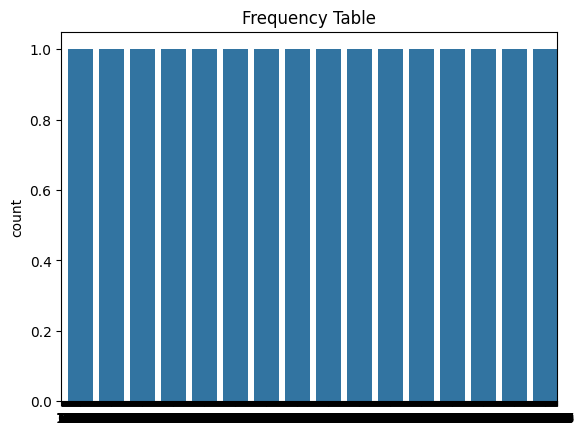

In [26]:
# Visualize the response variable.
sns.countplot(data=y).set_title("Frequency Table")
plt.show()

#### 1.2. Data pre-processing:

In [32]:
# lemmatizer = WordNetLemmatizer()
# def lemmatize_sentence(sentence):
#     words = word_tokenize(sentence)
#     lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in words]
#     return ' '.join(lemmatized_words)

# corpus = []
# for i in range(0, len(my_docs)):
#     review = re.sub(r'\W', ' ', str(my_docs[i]))
#     review = review.lower()
#     review = re.sub(r'^br$', ' ', review)
#     review = re.sub(r'\s+br\s+',' ',review)
#     review = re.sub(r'\s+[a-z]\s+', ' ',review)
#     review = re.sub(r'^b\s+', '', review)
#     review = re.sub(r'\s+', ' ', review)               # Remove the excess white spaces introduced in the previous steps.
#     review = lemmatize_sentence(review)  # Lematización
#     corpus.append(review)  

In [68]:


# Cargar el modelo de lenguaje en español
nlp = spacy.load('es_core_news_sm')

def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    lemmatized_sentence = ' '.join([token.lemma_ for token in doc])
    return lemmatized_sentence

corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    #review = lemmatize_sentence(review)  # Lematización
    corpus.append(review)


In [69]:
# Just show a document.
corpus[1]

'good films are hard to find these days ngreat films are beyond rare nproof of life russell crowe one two punch of deft kidnap and rescue thriller is one of those rare gems na taut drama laced with strong and subtle acting an intelligent script and masterful directing together it delivers something virtually unheard of in the film industry these days genuine motivation in story that rings true nconsider the strange coincidence of russell crowe character in proof of life making the moves on distraught wife played by meg ryan character in the film all while the real russell crowe was hitching up with married woman meg ryan in the outside world ni haven seen this much chemistry between actors since mcqueen and mcgraw teamed up in peckinpah masterpiece the getaway nbut enough with the gossip let get to the review nthe film revolves around the kidnapping of peter bowman david morse an american engineer working in south america who is kidnapped during mass ambush of civilians by anti governm

#### 1.3. Create a TF IDF representation:

In [70]:
TFIDF = TfidfVectorizer(max_features = 1000, min_df = 2, max_df = 0.8, ngram_range=(1,2))
TFIDF.fit(corpus)                                          # Create a TF IDF model. 
X = TFIDF.transform(corpus).toarray()   #Transforms Documents to document-term matrix  
X.shape

(2000, 1000)

#### 1.4. Logistic regression training and testing:

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [72]:
# Training.
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [73]:
# Testing.
y_pred = LR.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [74]:
# Confusion matrix.
#Thus in binary classification, the count of true negatives is
#C_{0,0}, false negatives is C_{1,0}, true positives is
#C_{1,1} and false positives is C_{0,1}.
#    neg pos
#neg
#pos
print(conf_mat)

[[240  61]
 [ 52 247]]


In [75]:
# Accuracy.
print(np.round(acc,3))

0.812


# 2. Naive Bayes implementation

In [37]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(conf_mat)
print(np.round(acc,3))

[[232  69]
 [ 88 211]]
0.738
